In [1]:
from sklearn.neighbors.kde import KernelDensity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Fraud: A how-to guide

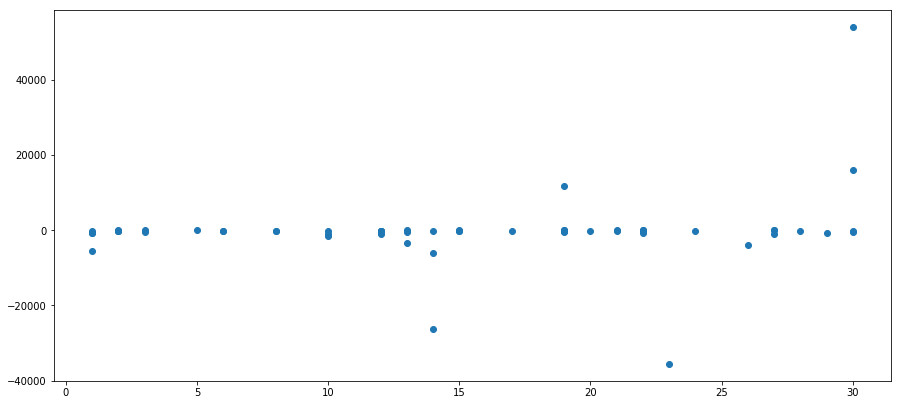

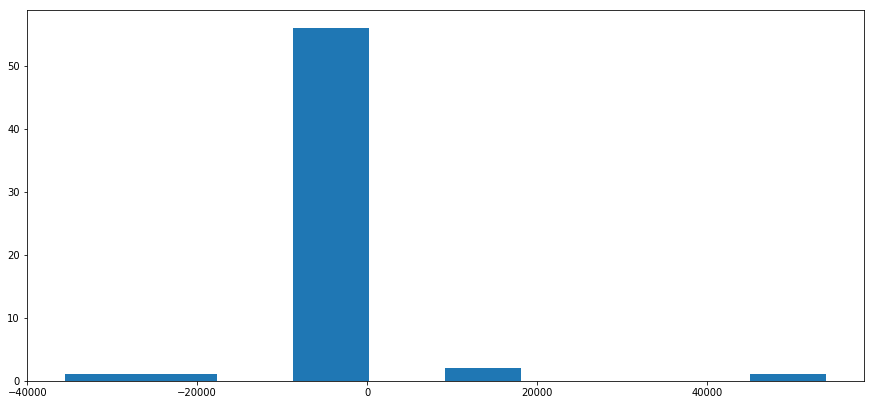

array([[ 2.69466151e+01,  3.95850066e+01],
       [ 9.03482207e-01, -8.64387019e+02],
       [ 2.19106120e+01, -5.66965911e+01],
       [ 1.54005592e+01, -2.09916769e+02],
       [ 3.17959904e+00, -3.85526000e+02],
       [ 8.00961408e+00, -1.69880501e+02],
       [ 9.85431666e+00, -1.09482299e+03],
       [ 1.99118408e+00, -1.60521967e+02],
       [ 1.02341345e+00, -5.61819875e+03],
       [ 1.21731094e+01, -1.00984599e+03]])

In [4]:
df = pd.read_csv('Fraud.csv')
df.head (n=5)

data = []
for i in range (len(df)-1):
    if df['Date'][i][2:10] == 'Jun2017':
        data.append ([int(df['Date'][i][:2]), df['Amount'][i]])
data = np.array(data)

plt.figure (figsize = (15,15))
plt.subplot (2,1,1)
plt.scatter(data[:,0], data[:,1])
plt.show()

plt.figure (figsize = (15,15))
plt.subplot (2,1,2)
plt.hist (data[:,1], bins = 10)
plt.show()

kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(data)
kde.sample (n_samples = 10)

In [15]:
kde.score_samples (n_samples = 4)

TypeError: score_samples() got an unexpected keyword argument 'n_samples'

### Clustering survey data

In [52]:
import numpy as np

p_cluster = [0.4, 0.3, 0.15, 0.15]

n_questions = 20
n_people = 1000
n_clusters = len(p_cluster)

biases = np.random.beta(0.75, 0.75, size=(n_questions, n_clusters))
people = np.random.choice(range(n_clusters), size=n_people, p=p_cluster)
answers = np.zeros((n_people, n_questions), dtype=bool)

for a in range(n_people):
    cluster = people[a]
    answers[a, :] = np.random.rand(n_questions) < biases[:, cluster]

np.savetxt("questionnaire.csv", answers, delimiter=",", fmt="%d")
np.savetxt("questionnaire_answers.csv", people, delimiter=",", fmt="%d")
np.savetxt("questionnaire_biases.csv", biases, delimiter=",", fmt="%.3f")

In [10]:
biases

0.35

In [24]:
import numpy as np

answers = np.loadtxt("questionnaire.csv", delimiter=",")
n_people, n_questions = answers.shape
n_clusters = 4

p_clusters = np.asarray([0.25, 0.25, 0.25, 0.25])
biases = np.random.beta(0.75, 0.75, size=(n_questions, n_clusters))


def expectation(answers, biases, p_clusters):

    # This is probably not the correct answer!
    people = np.zeros((n_people, n_clusters))
    
    for person in range(n_people):
        person_answers = answers[person]
        
        for cluster in range(n_clusters):
            
            p_cluster_given_answer =  p_clusters[cluster] #prior
            
            for question_i, answer in enumerate(person_answers):
                
                # join probability of cluster given observed answers
                p_cluster_given_answer *= (answer*biases[question_i, cluster] + (1-answer)*(1- biases[question_i, cluster]))
                
            people[person, cluster] = p_cluster_given_answer
    # normalize the distributions
    people = people / people.sum(axis=1, keepdims=1)
    return people


def maximization(answers, people):
    # Treating all the data as visible, now infer the parameters for the model.
    for i in range(answers.shape[0]):
        biases = answers[i].mean()
    
    # This is probably not the correct answer!
#     biases = np.zeros((n_questions, n_clusters)) + 0.5
    return biases

for i in range(10):
    people = expectation(answers, biases, p_clusters)
    biases = maximization(answers, people)

print(biases)
print(people)

0.35
[[0.05913659 0.15749203 0.37533506 0.40803632]
 [0.65905038 0.15078046 0.10927837 0.08089079]
 [0.35362639 0.44301759 0.18776731 0.01558871]
 ...
 [0.28221371 0.02854967 0.66673957 0.02249705]
 [0.37432373 0.30640544 0.25687377 0.06239706]
 [0.3162554  0.25252658 0.22419352 0.2070245 ]]


In [9]:
biases

0.35